In [7]:
import pandas as pd
import numpy as np

# Knn on glass dataset

In [8]:
glass=pd.read_csv("D:\Data Science\Assignments\Assignment #13 KNN\glass.csv")
glass["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [9]:
data = glass.describe()
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [10]:
def norm_fumc(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [11]:
norm = norm_fumc(glass.iloc[:,0:9])
glass1 = glass.iloc[:,9]

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(norm,glass1,test_size = 0.4,stratify = glass1)

In [13]:
glass["Type"].value_counts()
y_train.value_counts()
y_test.value_counts()

2    30
1    28
7    12
3     7
5     5
6     4
Name: Type, dtype: int64

In [14]:
from sklearn.neighbors import KNeighborsClassifier as KN

In [15]:
model = KN(n_neighbors = 5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [16]:
train_accuracy = np.mean(model.predict(x_train)==y_train)
train_accuracy

0.7578125

In [17]:
test_accuracy = np.mean(model.predict(x_test)==y_test)
test_accuracy

0.5697674418604651

In [18]:
model2 = KN(n_neighbors = 9)
model2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [19]:
train2_accuracy = np.mean(model2.predict(x_train)==y_train)
train2_accuracy

0.6875

In [20]:
test2_accuracy = np.mean(model2.predict(x_test)==y_test)
test2_accuracy

0.6162790697674418

In [21]:
acc = []

In [22]:
for i in range (4,30,1):
    model = KN(n_neighbors = i)
    model.fit(x_train,y_train)
    train_acc = np.mean(model.predict(x_train)==y_train)
    test_acc = np.mean(model.predict(x_test)==y_test)
    acc.append([train_acc, test_acc])

In [23]:
import matplotlib.pyplot as plt

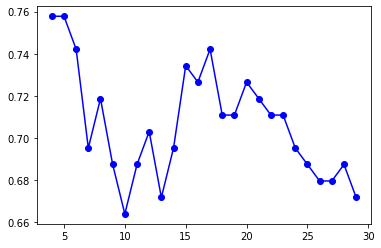

In [24]:
plt.plot(np.arange(4,30,1),[i[0] for i in acc],'bo-')

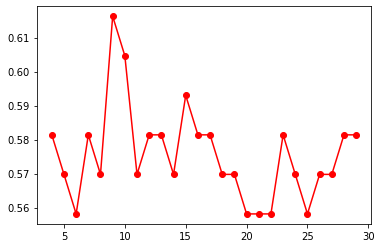

In [25]:

plt.plot(np.arange(4,30,1),[i[1] for i in acc],'ro-')

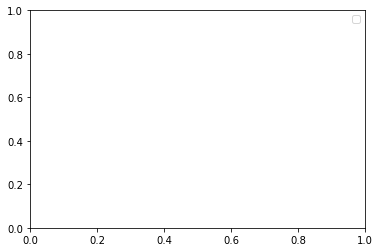

In [26]:
plt.legend(["train","test"])

In [27]:
model3 = KN(n_neighbors = 6)
model3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [28]:
pred_train = model3.predict(x_train)
cross_tab = pd.crosstab(y_train,pred_train)

In [29]:
train_accuracy = np.mean(pred_train == y_train)
train_accuracy

0.7421875

In [30]:
pred_test = model3.predict(x_test)
cross_tab_test = pd.crosstab(y_test,pred_test)

In [31]:
test_accuracy=np.mean(pred_test ==y_test)
test_accuracy

0.5581395348837209

# Knn on zoo datase

In [32]:
zoo=pd.read_csv("D:\Data Science\Assignments\Assignment #13 KNN\Zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [33]:
zoo.rename(columns = {"animal name":"animalname"},inplace =True)

In [34]:
ani = zoo["animalname"].value_counts()
ani

frog        2
polecat     1
antelope    1
rhea        1
vole        1
           ..
wolf        1
clam        1
mole        1
tuatara     1
chub        1
Name: animalname, Length: 100, dtype: int64

In [35]:
zoo["type"].value_counts()
data = zoo.describe()
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   animalname  101 non-null    object
 1   hair        101 non-null    int64 
 2   feathers    101 non-null    int64 
 3   eggs        101 non-null    int64 
 4   milk        101 non-null    int64 
 5   airborne    101 non-null    int64 
 6   aquatic     101 non-null    int64 
 7   predator    101 non-null    int64 
 8   toothed     101 non-null    int64 
 9   backbone    101 non-null    int64 
 10  breathes    101 non-null    int64 
 11  venomous    101 non-null    int64 
 12  fins        101 non-null    int64 
 13  legs        101 non-null    int64 
 14  tail        101 non-null    int64 
 15  domestic    101 non-null    int64 
 16  catsize     101 non-null    int64 
 17  type        101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [36]:
zoo["legs"].var()

4.134653465346538

In [37]:
zoo["hair"].var()

0.24693069306930682

In [38]:
zoo["feathers"].var()

0.1603960396039605

In [39]:
zoo["eggs"].var()

0.24534653465346504

In [40]:
zoo["milk"].var()

0.2435643564356434

In [41]:
zoo["airborne"].var()

0.18297029702970313

In [42]:
variance = zoo.var()

{'whiskers': [<matplotlib.lines.Line2D at 0x26033dc2a90>,
 'caps': [<matplotlib.lines.Line2D at 0x26033dce190>,
 'boxes': [<matplotlib.lines.Line2D at 0x26033dc2790>],
 'medians': [<matplotlib.lines.Line2D at 0x26033dce850>],
 'fliers': [<matplotlib.lines.Line2D at 0x26033dceb50>],
 'means': []}

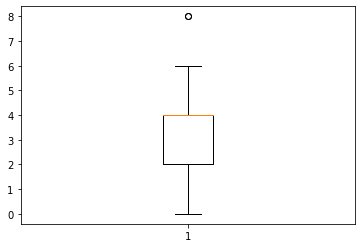

In [43]:
plt.boxplot(zoo["legs"])

{'whiskers': [<matplotlib.lines.Line2D at 0x26033e1be20>,
 'caps': [<matplotlib.lines.Line2D at 0x26033e2a520>,
 'boxes': [<matplotlib.lines.Line2D at 0x26033e1bac0>],
 'medians': [<matplotlib.lines.Line2D at 0x26033e2abe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26033e2aee0>],
 'means': []}

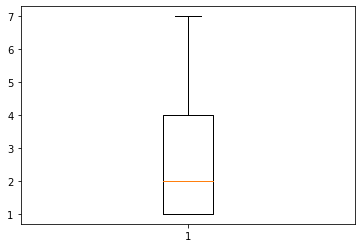

In [44]:
plt.boxplot(zoo["type"])

(array([23.,  0., 27.,  0.,  0., 38.,  1., 10.,  0.,  2.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

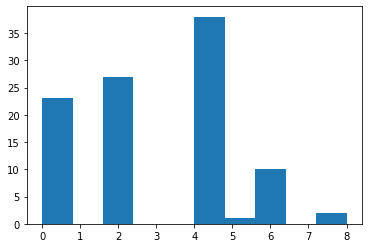

In [45]:
plt.hist(zoo["legs"])

In [46]:
dummy = pd.get_dummies(zoo["animalname"],drop_first =True)

In [47]:
zoo = pd.concat([zoo,dummy],axis=1)

In [48]:
zoo = zoo.drop(["animalname"],axis=1)

In [49]:
zoo["legs"].value_counts()
zoo["legs"],_=pd.factorize(zoo["legs"])

In [50]:
labels = zoo.iloc[:,16]
features = zoo.drop(["type"],axis=1)

In [51]:
data = norm_fumc(features)

In [52]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size =0.2, stratify=labels)

In [53]:
model1 =KN(n_neighbors = 5)
model1.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
train_acc = np.mean((model1.predict(x_train)==y_train))
train_acc

0.9625

In [55]:
test_acc = np.mean(model1.predict(x_test)==y_test)
test_acc

0.9523809523809523

In [56]:
model2 = KN(n_neighbors=7)
model2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [57]:
train2_acc = np.mean(model2.predict(x_train)==y_train)
train2_acc

0.925

In [58]:
test2_acc = np.mean(model2.predict(x_test)==y_test)
test2_acc

0.9523809523809523

In [59]:
acc=[]

In [67]:
for i in range(7,50,2):
    model2=KN(n_neighbors = i)
    model2.fit(x_train,y_train)
    train_acc = np.mean(model2.predict(x_train)==y_train)
    test_acc = np.mean(model2.predict(x_test)==y_test)
    acc.append([train_acc,test_acc])

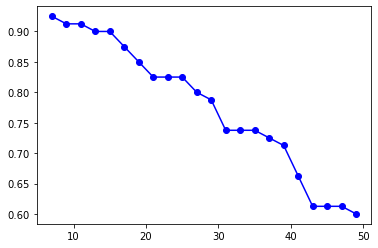

In [68]:
plt.plot(np.arange(7,50,2),[i[0] for i in acc],"bo-")

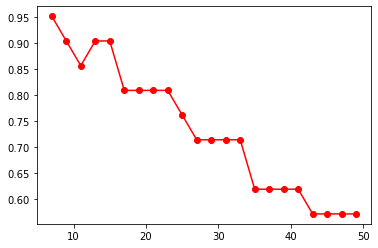

In [69]:

plt.plot(np.arange(7,50,2),[i[1] for i in acc],"ro-")

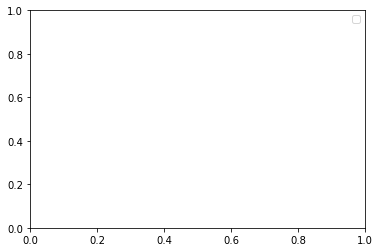

In [70]:
plt.legend(["train_acc", "test_acc"])

In [71]:
model_fin = KN(n_neighbors = 17) 
model_fin.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [72]:
train_fin = np.mean(model_fin.predict(x_train)==y_train)
train_fin

0.875

In [73]:
test_fin =np.mean(model_fin.predict(x_test)==y_test)
test_fin

0.8095238095238095